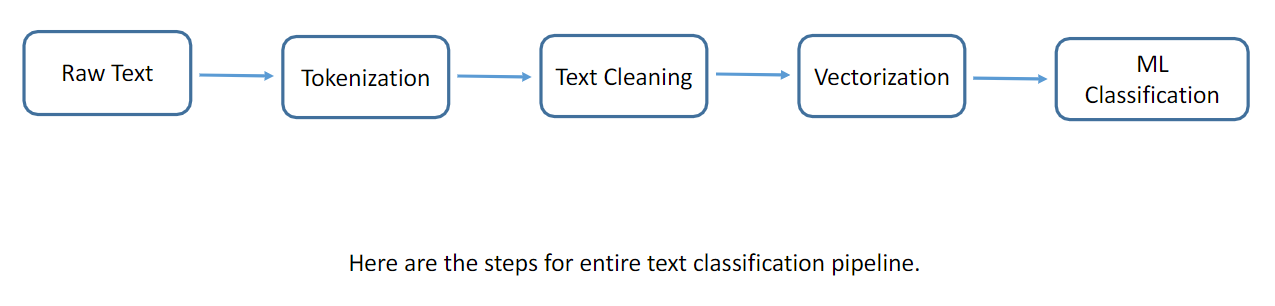

# Word Embeddings

To represent words as vector (Count Vectoizer to Word2Vec)

## Why do we need word embeddings

## Types of Word Embeddings

=> Frequecy based Embedding
       1. Count Vector
       2. TF-IDF Vector
       3. Co-Occurence Vector
=> prediction based Embedding
       1. CBOW(Continuos Bag of Words)
       2. Skip - Gram Model

# Count Vector

  Simplest form of text representation in numbers

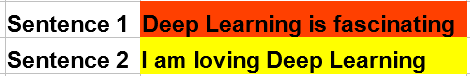 

## Calculation using Python

In [32]:
import pandas as pd
import sklearn as sk
import math #Tocalculate IDF

first= 'Deep Learning is fascinating'
second= 'I am loving Deep Learning'

#split spring into words
first = first.split(" ")
second= second.split(" ")

#to remove duplicate words
total= set(first).union(set(second))
print(total)

wordDictA = dict.fromkeys(total, 0) 
wordDictB = dict.fromkeys(total, 0)
for word in first:
    wordDictA[word]+=1
    
for word in second:
    wordDictB[word]+=1
#Output 
pd.DataFrame([wordDictA, wordDictB])

{'I', 'fascinating', 'loving', 'am', 'is', 'Deep', 'Learning'}


,I,fascinating,loving,am,is,Deep,Learning
0,0,1,0,0,1,1,1
1,1,0,1,1,0,1,1


## Using sklearn

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
sent = ['Deep Learning is is fascinating', 
        'am loving Deep Learning lot'
       ]
vect = CountVectorizer(analyzer= 'word')
sent_vt = vect.fit_transform(sent)

count_tokens = vect.get_feature_names()
df_countvec = pd.DataFrame(data = sent_vt.toarray(),index = ['sentence1', 'sentence2'], columns = count_tokens)
print(df_countvec)

           am  deep  fascinating  is  learning  lot  loving
sentence1   0     1            1   2         1    0       0
sentence2   1     1            0   0         1    1       1


## Challgenes/Limitation in Count Vector

1. Increase in size
2. Many 0's
3. no meaningful information

# Term Frequency- Inverse Document Frequency(TF-IDF) 

Weight is used to evaluate how important a word in corpus

## How to calculate Tf-idf weight

sent = ['Deep Learning is fascinating', 
        'I am loving Deep Learning'
       ]

Total Docuemnt = 2 

Sentence 1=> Total words = 4
Sentence 2=> Total words = 5

TF =>  how frequently a term occurs in a document

Formula:
TF(t) = No.of times a terms t occurs in the document/ total no.of terms in a document

Sentence 1:
TF(Deep) = 1/4 = 0.25
TF(is)   = 1/4 = 0.25

Sentence 2: 
TF(Deep) = 1/5 = 0.2

IDF => which measures, how important a term by providing lower weights to very common terms

Formula:
IDF(t) = log(total no. of documents \total no of documents with term t in it)
IDF(Deep) = 2/2 = 1, 
log(IDF(Deep))=> log(1) = 0
IDF(is)   = 2/1 = 2, 
log(IDF(is))=> log(2) = 0.313
 
TF-idf(t) = TF(t)*IDF(t) 
TF-idf(is) = TF(is)*log(IDF(is))
TF-idf(is) = 0.25*0.3 = 0.075


TF-idf(Deep) = TF(Deep)*log(IDF(Deep))
TF-idf(Deep) = 0.25*0  = 0

## Calculation using Python

In [19]:
#To calculate Term Freguency
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict
#running our sentences through the tf function:
tfFirst = computeTF(wordDictA, first)
tfSecond = computeTF(wordDictB, second)
#Converting to dataframe for visualization
tf_df= pd.DataFrame([tfFirst, tfSecond])

In [20]:
tf_df

,I,fascinating,loving,am,is,Deep,Learning
0,0.0,0.25,0.0,0.0,0.25,0.25,0.25
1,0.2,0.00,0.2,0.2,0.00,0.20,0.20


In [26]:
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict
#inputing our sentences in the log file
idfs = computeIDF([wordDictA, wordDictB])
#The actual calculation of TF*IDF from the table above:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf
#running our two sentences through the IDF:
idfFirst = computeTFIDF(tfFirst, idfs)
idfSecond = computeTFIDF(tfSecond, idfs)
#putting it in a dataframe
tfidf= pd.DataFrame([idfFirst, idfSecond])

In [27]:
tfidf

,I,fascinating,loving,am,is,Deep,Learning
0,0.000000,0.075257,0.000000,0.000000,0.075257,0.0,0.0
1,0.060206,0.000000,0.060206,0.060206,0.000000,0.0,0.0


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

sent = ['Deep Learning is fascinating', 
        'i am loving Deep  Learning'
       ]
    
#vect = TfidfVectorizer(norm = False, smooth_idf = False, analyzer= 'word')
vect = TfidfVectorizer(use_idf = True, smooth_idf = False,vocabulary=None,input='content',norm='l2',
    lowercase=True,preprocessor=None,
    tokenizer=None
                      )
sent_vt = vect.fit_transform(sent)
tfid_tokens = vect.get_feature_names()
df_tfidvec = pd.DataFrame(data = sent_vt.toarray(),index = ['sentence1', 'sentence2'], columns = tfid_tokens)
sent_vect = vect.fit_transform(sent)
print(df_tfidvec)

                 am      deep  fascinating        is  learning    loving
sentence1  0.000000  0.359594     0.608845  0.608845  0.359594  0.000000
sentence2  0.608845  0.359594     0.000000  0.000000  0.359594  0.608845


##  After vectorization

    Numeric data
    Tabular format


## Challenges/Limitation in Tf-IDF

==> context 
==> Sequence of word is completley lost

Ex: Movie is fantastically bad

# Conclussion

  To overcome the context problem, we use differnt technigues in the upcoming session